# Hi !
RFM Analysis and Customer Segmentation using K-Means Clustering

Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
# df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx',engine='openpyxl')
# df

In [3]:
df = pd.read_excel('Online Retail.xlsx',engine='openpyxl')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe().T
#We may delete the rows of invoice which starts with 'c'

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [8]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("-"*29)

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C569490       1
556417        1
556430        1
556438        1
C541674       1
Name: InvoiceNo, Length: 25900, dtype: int64
-----------------------------
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21330        1
79323S       1
84206B       1
21310        1
22143        1
Name: StockCode, Length: 4070, dtype: int64
-----------------------------
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
re-adjustment                            1
PORCELAIN HANGING BELL SMALL             1
20713                                    1
PURPLE/TURQ FLOWERS HANDBAG              1
16 PC CUTLERY SET PANTRY DESIGN          1
Name:

<AxesSubplot:xlabel='Country', ylabel='count'>

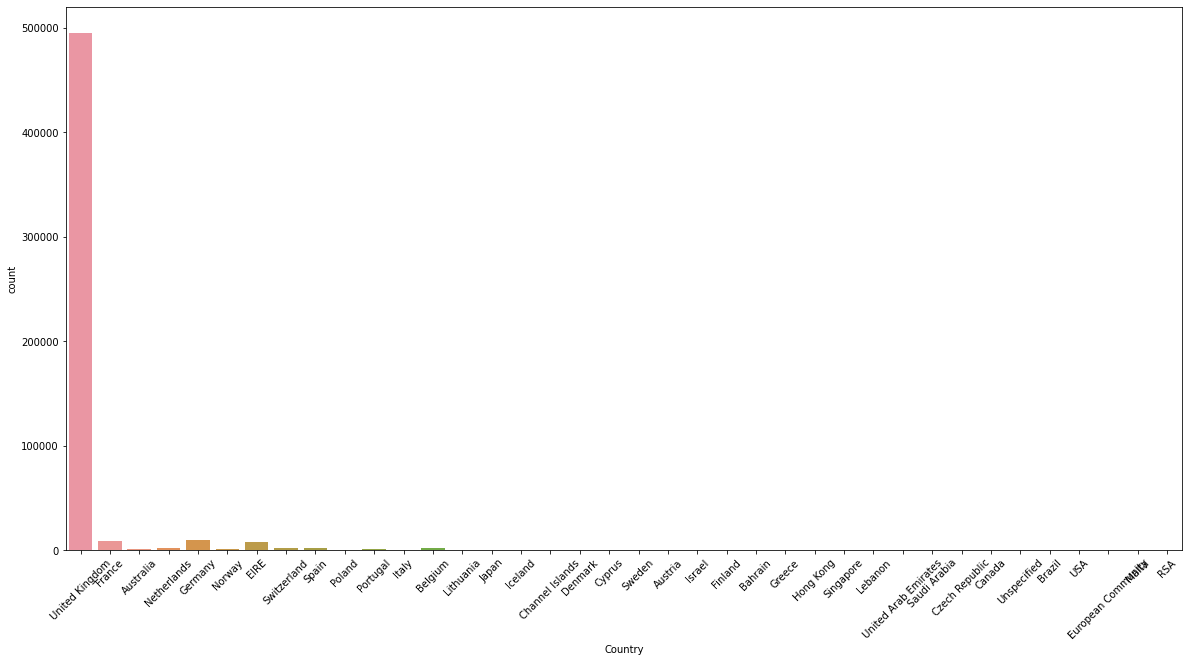

In [9]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot('Country',data=df)

In [10]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("-"*29)

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C569490       1
556417        1
556430        1
556438        1
C541674       1
Name: InvoiceNo, Length: 25900, dtype: int64
-----------------------------
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21330        1
79323S       1
84206B       1
21310        1
22143        1
Name: StockCode, Length: 4070, dtype: int64
-----------------------------
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
re-adjustment                            1
PORCELAIN HANGING BELL SMALL             1
20713                                    1
PURPLE/TURQ FLOWERS HANDBAG              1
16 PC CUTLERY SET PANTRY DESIGN          1
Name:

<AxesSubplot:>

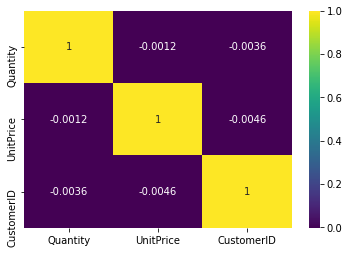

In [11]:
sns.heatmap(df.corr(),annot=True, cmap='viridis')

In [12]:
"""for i in df.columns:
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    sns.countplot(x=i,data=df,order=pd.value_counts(df[i]).iloc[:15].index)"""

'for i in df.columns:\n    plt.figure(figsize=(20,10))\n    plt.xticks(rotation=45)\n    sns.countplot(x=i,data=df,order=pd.value_counts(df[i]).iloc[:15].index)'

In [13]:
#df2[df2['InvoiceNo'].str.contains('C',case=False,na=False)].sort_values(by='InvoiceNo')

# #Determines

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


---


First of all, to observe the structure of the data and missing values, you can use exploratory data analysis and data visualization techniques.

You must do descriptive analysis. Because you must understand the relationship of the features to each other and clear the noise and missing values in the data. After that, the data set will be ready for RFM analysis.

Before starting the RFM Analysis, you will be asked to do some analysis regarding the distribution of *Orders*, *Customers* and *Countries*. These analyzes will help the company develop its sales policies and contribute to the correct use of resources.

You will notice that the UK not only has the most sales revenue, but also the most customers. So you will continue to analyze only UK transactions in the next RFM Analysis, Customer Segmentation and K-Means Clustering topics.

Next, you will begin RFM Analysis, a customer segmentation technique based on customers' past purchasing behavior. 

By using RFM Analysis, you can enable companies to develop different approaches to different customer segments so that they can get to know their customers better, observe trends better, and increase customer retention and sales revenues.

You will calculate the Recency, Frequency and Monetary values of the customers in the RFM Analysis you will make using the data consisting of UK transactions. Ultimately, you have to create an RFM table containing these values.

In the Customer Segmentation section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

We will segment the customers ourselves based on their recency, frequency, and monetary values. But can an **unsupervised learning** model do this better for us? You will use the K-Means algorithm to find the answer to this question. Then you will compare the classification made by the algorithm with the classification you have made yourself.

Before applying K-Means Clustering, you should do data pre-processing. In this context, it will be useful to examine feature correlations and distributions. In addition, the data you apply for K-Means should be normalized.

On the other hand, you should inform the K-means algorithm about the number of clusters it will predict. You will also try the *** Elbow method *** and *** Silhouette Analysis *** to find the optimum number of clusters.

After the above operations, you will have made cluster estimation with K-Means. You should visualize the cluster distribution by using a scatter plot. You can observe the properties of the resulting clusters with the help of the boxplot. Thus you will be able to tag clusters and interpret results.

Finally, you will do Cohort Analysis with the data you used at the beginning, regardless of the analysis you have done before. Cohort analysis is a subset of behavioral analytics that takes the user data and breaks them into related groups for analysis. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.


# #Project Structures

- Data Cleaning & Exploratory Data Analysis
- RFM Analysis
- Customer Segmentation
- Applying K-Means Clustering
- Create Cohort and Conduct Cohort Analysis

# #Tasks

#### 1. Data Cleaning & Exploratory Data Analysis

- Import Modules, Load Data & Data Review
- Follow the Steps Below

    *i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.*
    
    *ii. What does the letter "C" in the invoiceno column mean?*
    
    *iii. Handling Missing Values*
    
    *iv. Clean the Data from the Noise and Missing Values*
    
    *v. Explore the Orders*
    
    *vi. Explore Customers by Country*
    
    *vii. Explore the UK Market*
    
#### 2. RFM Analysis

- Follow the steps below

   *i. Import Libraries*
   
   *ii. Review "df_uk" DataFrame (the df_uk what you create at the end of the Task 1)*
   
   *iii. Calculate Recency*
   
   *iv. Calculate Frequency*
   
   *v. Calculate Monetary Values*
   
   *vi. Create RFM Table*

#### 3. Customer Segmentation with RFM Scores
- Calculate RFM Scoring

    *i. Creating the RFM Segmentation Table*
 
- Plot RFM Segments

#### 4. Applying K-Means Clustering
- Data Pre-Processing and Exploring

    *i. Define and Plot Feature Correlations*
 
    *ii. Visualize Feature Distributions*
 
    *iii. Data Normalization*

- K-Means Implementation

    *i. Define Optimal Cluster Number (K) by using "Elbow Method" and "Silhouette Analysis"*
 
    *ii. Visualize the Clusters*
 
    *iii. Assign the label*
 
    *iv. Conclusion*
 
#### 5. Create Cohort and Conduct Cohort Analysis
- Future Engineering

    *i. Extract the Month of the Purchase*
 
    *ii. Calculating time offset in Months i.e. Cohort Index*
 
- Create 1st Cohort: User Number & Retention Rate 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 1 using seaborn and matplotlib*

- Create 2nd Cohort: Average Quantity Sold 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 2 using seaborn and matplotlib*

- Create 3rd Cohort: Average Sales

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 3 using seaborn and matplotlib*
    
- **Note: There may be sub-tasks associated with each task, you will see them in order during the course of the work.**


# 1. Data Cleaning & Exploratory Data Analysis

### i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

In [14]:
df[['InvoiceNo', 'Quantity' , 'UnitPrice'] ]

,InvoiceNo,Quantity,UnitPrice
0,536365,6,2.55
1,536365,6,3.39
2,536365,8,2.75
3,536365,6,3.39
4,536365,6,3.39
...,...,...,...
541904,581587,12,0.85
541905,581587,6,2.10
541906,581587,4,4.15
541907,581587,4,4.15


In [15]:
df[['InvoiceNo', 'Quantity' , 'UnitPrice'] ].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

In [16]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


### ii. What does the letter "C" in the InvoiceNo column mean?

In [18]:
df[df['InvoiceNo'].str.contains('C',case=False,na=False)].sort_values(by='InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


When we filter canceled orders by Quantity> 0 or filter non-canceled orders by Quantity <0 nothing returns, this confirms that negative values mean the order was canceled. So lets find out how many orders were cancelled?

In [19]:
df[ (df['InvoiceNo'].str.contains('C',case=False,na=False)) & (df['Quantity']>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [20]:
#df[ (~df['InvoiceNo'].str.contains('C',case=False,na=False)) & (df['Quantity']<0)]['CustomerID'].value_counts(dropna=False)
df[ (~df['InvoiceNo'].str.contains('C',case=False,na=False)) & (df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


#### 9288 or about 36% of the orders were cancelled. Looking deeper into why these orders were cancelled may prevent future cancellations. Now let's find out what a negative UnitPrice means.


In [21]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


### iii. Handling Missing Values

In [22]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Since the customer ID's are missing, lets assume these orders were not made by the customers already in the data set because those customers already have ID's. 

We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. 


In [23]:
df['CustomerID'].value_counts(dropna=False)

NaN        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
16148.0         1
16144.0         1
16138.0         1
16093.0         1
17948.0         1
Name: CustomerID, Length: 4373, dtype: int64

### iv. Clean the Data from the Noise and Missing Values

In [25]:
#ok

### v. Explore the Orders


1. Find the unique number of InvoiceNo  per customer

In [26]:
df.groupby('CustomerID').nunique()[['InvoiceNo']].sort_values('InvoiceNo',ascending=False).head(10)

,InvoiceNo
CustomerID,
14911.0,248
12748.0,224
17841.0,169
14606.0,128
13089.0,118
15311.0,118
12971.0,89
14527.0,86
13408.0,81


2. What's the average number of unqiue items per order or per customer?

In [27]:
df.groupby(['StockCode','CustomerID']).mean()[['Quantity']]

Quantity
StockCode CustomerID          
10002     12451.0         12.0
          12510.0         24.0
          12583.0         48.0
          12637.0         12.0
          12673.0          1.0
...                        ...
POST      17935.0          1.0
          17940.0         -1.0
          18223.0         -1.0
          18257.0         -1.0
          18270.0         -1.0

[267615 rows x 1 columns]

3. Let's see how this compares to the number of unique products per customer.

In [28]:
df.groupby(['CustomerID']).nunique()[['StockCode']].sort_values('StockCode',ascending=False).head(10)

,StockCode
CustomerID,
14911.0,1794
12748.0,1769
17841.0,1331
14096.0,1121
14298.0,884
14606.0,832
14769.0,718
14156.0,716
14646.0,703


### vi. Explore Customers by Country

1. What's the total revenue per country?

In [29]:
df2 = df.copy()

In [30]:
df2['Revenue'] = df2['Quantity'] * df2['UnitPrice']
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [31]:
df2.groupby(['Country']).sum()[['Revenue']].sort_values('Revenue',ascending=False)

,Revenue
Country,
United Kingdom,8.187806e+06
Netherlands,2.846615e+05
EIRE,2.632768e+05
Germany,2.216982e+05
France,1.974039e+05
Australia,1.370773e+05
Switzerland,5.638535e+04
Spain,5.477458e+04
Belgium,4.091096e+04


2. Visualize number of customer per country

<AxesSubplot:xlabel='Country'>

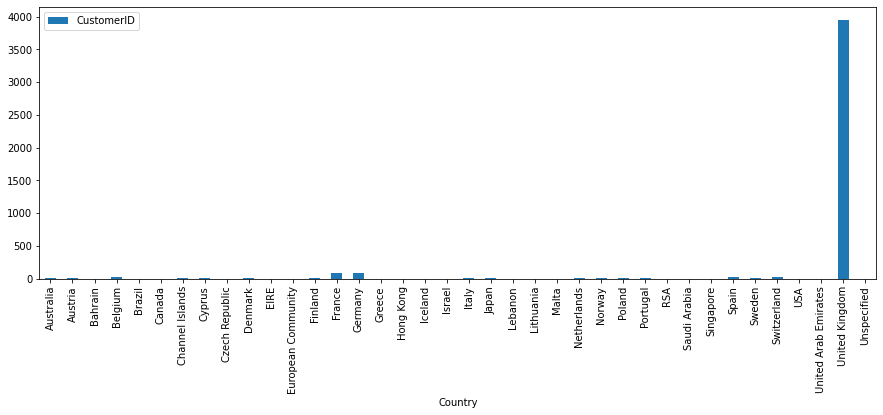

In [32]:
df2.groupby('Country')[['CustomerID']].nunique().plot(kind='bar',figsize=(15,5))

3. Visualize total cost per country

<AxesSubplot:xlabel='Country'>

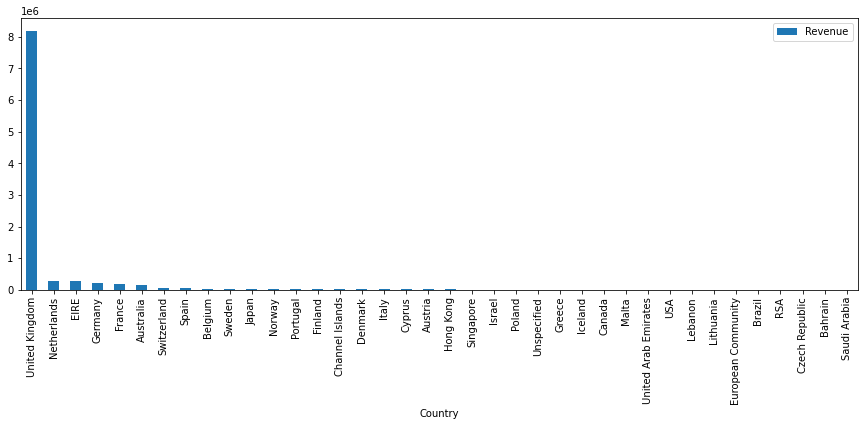

In [33]:
df2.groupby(['Country']).sum()[['Revenue']].sort_values('Revenue',ascending=False).plot(kind='bar',figsize=(15,5))

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### vii. Explore the UK Market


1. Create df_uk DataFrame

In [34]:
df_uk = df2[df['Country']=='United Kingdom']
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


2. What are the most popular products that are bought in the UK?

In [35]:
n = 10
df_uk.groupby('StockCode').sum()[['Quantity']].sort_values('Quantity',ascending=False).head(n)

,Quantity
StockCode,
22197,52928
84077,48326
85099B,43167
85123A,36706
84879,33519
22616,25307
21212,24702
22178,23242
17003,22801


In [36]:
n=10
df_uk['StockCode'].value_counts().sort_values(ascending=False).index[:n]

Index(['85123A', '85099B', 22423, 47566, 20725, 84879, 22197, 22720, 20727,
       22383],
      dtype='object')

### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

### i. Import Libraries

### ii. Review df_uk DataFrame

### iii. Recency: Days since last purchase
To calculate the recency values, follow these steps in order:

1. To calculate recency, we need to choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.
2. Create a new column called Date which contains the invoice date without the timestamp
3. Group by CustomerID and check the last date of purchase
4. Calculate the days since last purchase
5. Drop Last_Purchase_Date since we don't need it anymore
6. Plot RFM distributions

1. Choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.

In [37]:
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


2. Create a new column called Date which contains the invoice date without the timestamp

In [44]:
df_uk['Date'] = df_uk['InvoiceDate'].dt.date
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,373
...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12-09,0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12-09,0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12-09,0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12-09,0


In [46]:
df_uk['Date'] = pd.to_datetime(df_uk['Date'], utc=False)

In [47]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
 8   Revenue      495478 non-null  float64       
 9   Date         495478 non-null  datetime64[ns]
 10  Recency      495478 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 65.4+ MB


In [48]:
df_uk['Date'].max()

Timestamp('2011-12-09 00:00:00')

3. Group by CustomerID and check the last date of purchase

In [49]:
df_uk.groupby('CustomerID')[['Date']].max()

,Date
CustomerID,
12346.0,2011-01-18
12747.0,2011-12-07
12748.0,2011-12-09
12749.0,2011-12-06
12820.0,2011-12-06
...,...
18280.0,2011-03-07
18281.0,2011-06-12
18282.0,2011-12-02


4. Calculate the days since last purchase

In [50]:
df_uk['Recency'] = (df_uk['Date'].max() - df_uk['Date']).dt.days
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,373
...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12-09,0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12-09,0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12-09,0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12-09,0


5. Drop Last_Purchase_Date since we don't need it anymore

In [51]:
df_uk.groupby('CustomerID')[['Recency']].min()

,Recency
CustomerID,
12346.0,325
12747.0,2
12748.0,0
12749.0,3
12820.0,3
...,...
18280.0,277
18281.0,180
18282.0,7


In [52]:
df_uk.shape

(495478, 11)

In [53]:
df_uk[df_uk.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Recency
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,2010-12-01,373
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10,2010-12-01,373
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95,2010-12-01,373
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95,2010-12-01,373
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2.95,2010-12-01,373
...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,0.39,2011-12-09,0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49,2011-12-09,0
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,1.95,2011-12-09,0
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2.10,2011-12-09,0


In [54]:
df_uk = df_uk.drop_duplicates()

In [55]:
df_uk[df_uk.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Recency


In [56]:
df_uk.shape

(490300, 11)

In [57]:
df_uk.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133572
Country             0
Revenue             0
Date                0
Recency             0
dtype: int64

In [58]:
df_uk['CustomerID'].fillna('others',inplace=True)
df_uk['Description'].fillna('others',inplace=True)

In [59]:
df_uk.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Revenue        0
Date           0
Recency        0
dtype: int64

In [60]:
df_uk[(~df_uk['InvoiceNo'].apply(lambda x: isinstance(x, (int, np.int64))))  & (~df2['InvoiceNo'].str.contains('C',case=False,na=False)) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Recency
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,others,United Kingdom,11062.06,2011-08-12,119
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,others,United Kingdom,-11062.06,2011-08-12,119
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,others,United Kingdom,-11062.06,2011-08-12,119


6. Plot RFM distributions

<AxesSubplot:>

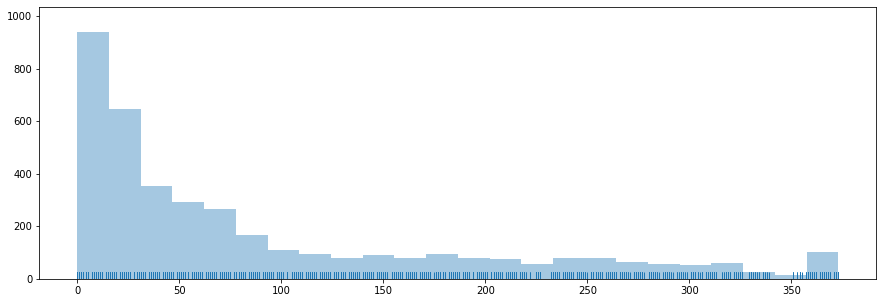

In [73]:
#RECENCY
plt.figure(figsize=(15,5))
sns.distplot(df_uk[df_uk['CustomerID']!='others'].groupby('CustomerID')[['Recency']].min(),kde=False, rug=True)
# i dont want to see effect of others

<AxesSubplot:>

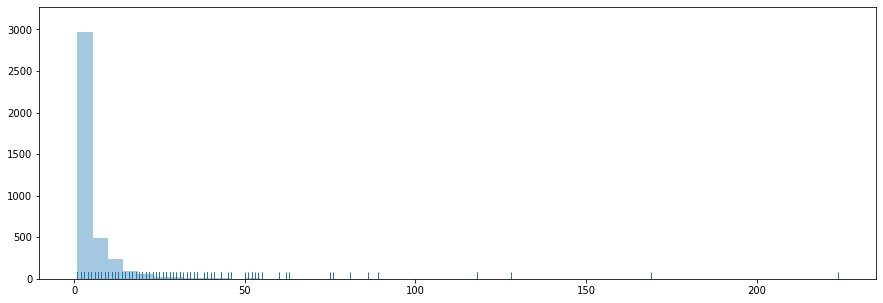

In [72]:
#FREQUENCY
plt.figure(figsize=(15,5))
sns.distplot(df_uk[df_uk['CustomerID']!='others'].groupby('CustomerID')[['InvoiceNo']].nunique(),kde=False, rug=True)
# i dont want to see effect of others

<AxesSubplot:>

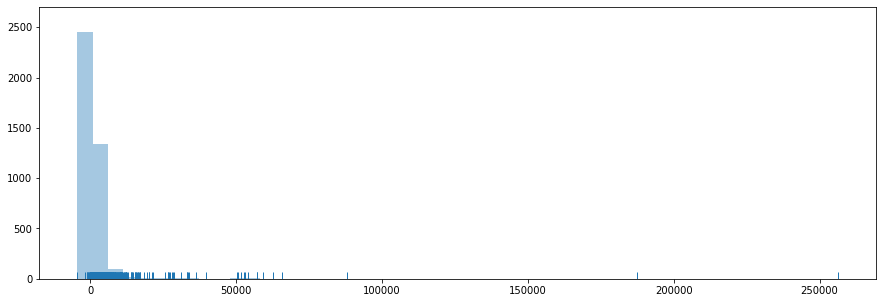

In [74]:
#MONETARY
plt.figure(figsize=(15,5))
sns.distplot(df_uk[df_uk['CustomerID']!='others'].groupby('CustomerID')[['Revenue']].sum(),kde=False, rug=True)
# i dont want to see effect of others

### vi. Create RFM Table
Merge the recency, frequency and motetary dataframes

In [129]:
df_rfm = df_uk[df_uk['CustomerID']!='others'].groupby('CustomerID')[['Recency']].min()
df_rfm['Frequency'] = df_uk[df_uk['CustomerID']!='others'].groupby('CustomerID')[['InvoiceNo']].nunique()
df_rfm['Monetary'] = df_uk[df_uk['CustomerID']!='others'].groupby('CustomerID')[['Revenue']].sum()
df_rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12747.0,2,11,4196.01
12748.0,0,224,28405.56
12749.0,3,8,3868.20
12820.0,3,4,942.34
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


# 3. Customer Segmentation with RFM Scores

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as [Customer Segmentation](https://clevertap.com/blog/rfm-analysis/).
Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. Some of the common ways of segmenting customers are based on their Recency-Frequency-Monatory values, their demographics like gender, region, country, etc, and some of their business-crafted scores. You will use Recency-Frequency-Monatory values for this case.

In this section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

## Calculate RFM Scoring

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.
<br>
<br>
**Note**: Data can be assigned into more groups for better granularity, but we will use 4 in this case.

1. Divide the df_rfm into quarters

In [131]:
df_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,3950.0,91.323038,100.236848,0.00,16.00,50.000,143.0000,373.00
Frequency,3950.0,5.027089,8.717306,1.00,1.00,3.000,5.0000,224.00
Monetary,3950.0,1708.140798,6548.935742,-4287.63,281.03,623.335,1517.7975,256438.49


1. Create two functions, one for Recency and one for Frequency and Monetary. For Recency, customers in the first quarter should be scored as 4, this represents the highest Recency value. Conversely, for Frequency and Monetary, customers in the last quarter should be scored as 4, representing the highest Frequency and Monetary values.

2. Score customers from 1 to 4 by applying the functions you have created. Also create separate score column for each value. 

In [132]:
def quartile_high_divider(df,col,x):
    if x > np.percentile(df[col],75):
        return 4
    elif x > np.percentile(df[col],50):
        return 3
    elif x > np.percentile(df[col],25):
        return 2
    else:
        return 1
def quartile_low_divider(df,col,x):
    if x > np.percentile(df[col],75):
        return 1
    elif x > np.percentile(df[col],50):
        return 2
    elif x > np.percentile(df[col],25):
        return 3
    else:
        return 4
    

In [133]:
df_rfm["Recency_segment"] = df_rfm['Recency'].apply(lambda x : quartile_low_divider(df_rfm,"Recency",x))
df_rfm["Frequency_segment"] = df_rfm['Frequency'].apply(lambda x : quartile_high_divider(df_rfm,"Frequency",x))
df_rfm["Monetary_segment"] = df_rfm['Monetary'].apply(lambda x : quartile_high_divider(df_rfm,"Monetary",x))
df_rfm['Score'] = df_rfm["Monetary_segment"] + df_rfm["Frequency_segment"] + df_rfm["Recency_segment"]
df_rfm

,Recency,Frequency,Monetary,Recency_segment,Frequency_segment,Monetary_segment,Score
CustomerID,,,,,,,
12346.0,325,2,0.00,1,2,1,4
12747.0,2,11,4196.01,4,4,4,12
12748.0,0,224,28405.56,4,4,4,12
12749.0,3,8,3868.20,4,4,4,12
12820.0,3,4,942.34,4,3,3,10
...,...,...,...,...,...,...,...
18280.0,277,1,180.60,1,1,1,3
18281.0,180,1,80.82,1,1,1,3
18282.0,7,3,176.60,4,2,1,7


4. Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Level

5. Calculate average values for each RFM_Level, and return a size of each segment 

In [134]:
df_rfm['Score'].describe()

count    3950.000000
mean        7.357975
std         2.879527
min         3.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: Score, dtype: float64

In [135]:
df_rfm['RFM_Level'] = df_rfm['Score'].apply(lambda x : 1 if x > 9 else 2)
df_rfm

,Recency,Frequency,Monetary,Recency_segment,Frequency_segment,Monetary_segment,Score,RFM_Level
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,2,1,4,2
12747.0,2,11,4196.01,4,4,4,12,1
12748.0,0,224,28405.56,4,4,4,12,1
12749.0,3,8,3868.20,4,4,4,12,1
12820.0,3,4,942.34,4,3,3,10,1
...,...,...,...,...,...,...,...,...
18280.0,277,1,180.60,1,1,1,3,2
18281.0,180,1,80.82,1,1,1,3,2
18282.0,7,3,176.60,4,2,1,7,2


In [136]:
df_rfm.groupby('RFM_Level')['Score'].mean()

RFM_Level
1    11.113036
2     5.914125
Name: Score, dtype: float64

In [137]:
df_rfm['RFM_Level'].value_counts()

2    2853
1    1097
Name: RFM_Level, dtype: int64

## Plot RFM Segments

1. Create your plot and resize it.

Using customer segmentation categories found [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales) we can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

2. How many customers do we have in each segment?

In [138]:
df_rfm.groupby('Score')['Score'].count()

Score
3     368
4     433
5     480
6     439
7     426
8     342
9     365
10    318
11    337
12    442
Name: Score, dtype: int64

In [139]:
df_rfm.groupby('RFM_Level')['Score'].count()

RFM_Level
1    1097
2    2853
Name: Score, dtype: int64

# 3. Applying K-Means Clustering

Now that we have our customers segmented into 6 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

## Data Pre-Processing and Exploring

### i. Define and Plot Feature Correlations

Create Heatmap and evaluate the results 

In [125]:
df_model=df_rfm.drop(['Score', 'RFM_Level'],axis=1)
df_model

,Recency,Frequency,Monetary,Recency_segment,Frequency_segment,Monetary_segment
CustomerID,,,,,,
12346.0,325,2,2,1,2,1
12747.0,2,11,45,4,4,3
12748.0,0,224,430,4,4,4
12749.0,3,8,83,4,4,4
12820.0,3,4,24,4,3,3
...,...,...,...,...,...,...
18280.0,277,1,8,1,1,1
18281.0,180,1,4,1,1,1
18282.0,7,3,11,4,2,1


<AxesSubplot:>

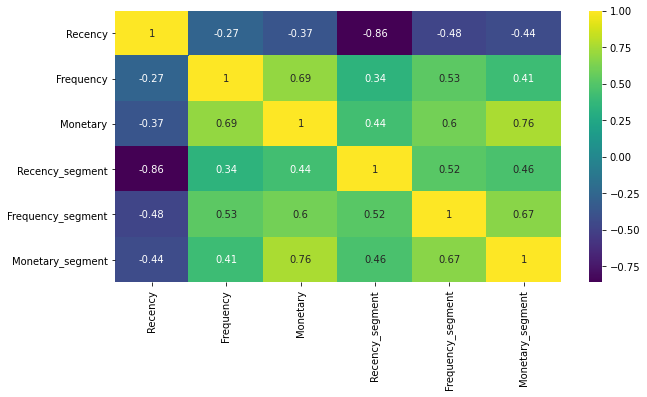

In [127]:
plt.figure(figsize=(10,5))
sns.heatmap(df_model.corr(),annot=True,cmap='viridis')

### ii. Visualize Feature Distributions

To get a better understanding of the dataset, you can costruct a scatter matrix of each of the three features in the RFM data.

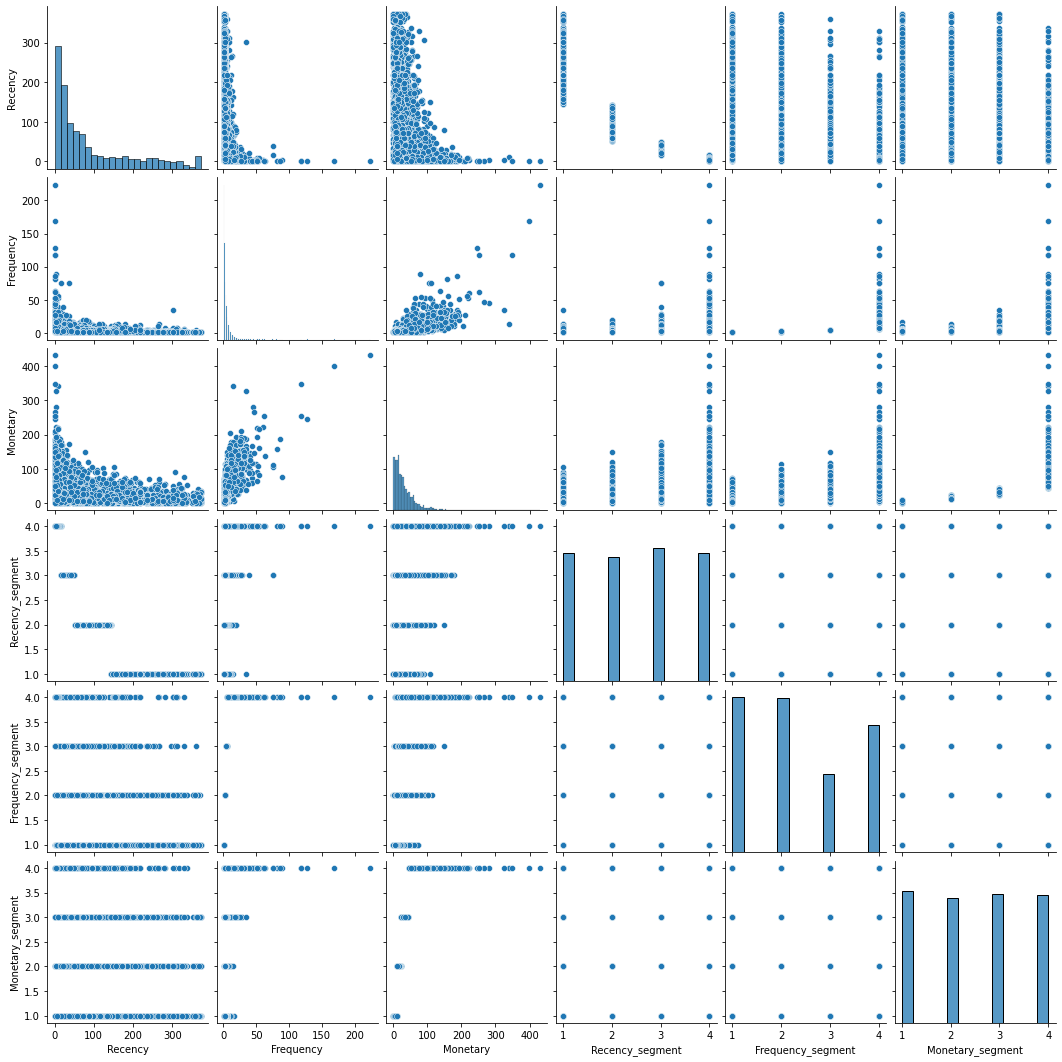

In [128]:
sns.pairplot(df_model)

### iii. Data Normalization

1. You can use the logarithm method to normalize the values in a column.

2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

In [170]:
X = df_model.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.33154326e+00, -3.47294453e-01, -9.22904102e-01,
        -1.35198946e+00, -3.01721861e-01, -1.32638606e+00],
       [-8.91232605e-01,  6.85265369e-01,  3.17817604e-01,
         1.33250703e+00,  1.43686508e+00,  4.53544275e-01],
       [-9.11187873e-01,  2.51225145e+01,  1.14266050e+01,
         1.33250703e+00,  1.43686508e+00,  1.34350945e+00],
       ...,
       [-8.41344433e-01, -2.32565583e-01, -6.63218164e-01,
         1.33250703e+00, -3.01721861e-01, -1.32638606e+00],
       [-8.81254971e-01,  1.25890971e+00,  1.24114538e+00,
         1.33250703e+00,  1.43686508e+00,  1.34350945e+00],
       [-4.92127234e-01, -2.32565583e-01,  4.23678887e-04,
         4.37674871e-01, -3.01721861e-01,  4.53544275e-01]])

In [171]:
df_scaled = pd.DataFrame(X_scaled, columns= [df_model.columns])
df_scaled

,Recency,Frequency,Monetary,Recency_segment,Frequency_segment,Monetary_segment
0,2.331543,-0.347294,-0.922904,-1.351989,-0.301722,-1.326386
1,-0.891233,0.685265,0.317818,1.332507,1.436865,0.453544
2,-0.911188,25.122514,11.426605,1.332507,1.436865,1.343509
3,-0.881255,0.341079,1.414269,1.332507,1.436865,1.343509
4,-0.881255,-0.117837,-0.288116,1.332507,0.567572,0.453544
...,...,...,...,...,...,...
3945,1.852617,-0.462023,-0.749780,-1.351989,-1.171015,-1.326386
3946,0.884786,-0.462023,-0.865196,-1.351989,-1.171015,-1.326386
3947,-0.841344,-0.232566,-0.663218,1.332507,-0.301722,-1.326386
3948,-0.881255,1.258910,1.241145,1.332507,1.436865,1.343509


## K-Means Implementation

For k-means, you have to set k to the number of clusters you want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
<br>
<br>
**Note**: K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

### i. Define the Optimal Number of Clusters

### ii. Model Fitting

In [172]:
from pyclustertend import hopkins
hopkins(df_scaled, df_scaled.shape[0])
##its close to 0 so that data has tendency to "clustering"

0.015608431179504556

Text(0.5, 1.0, 'Elbow Method')

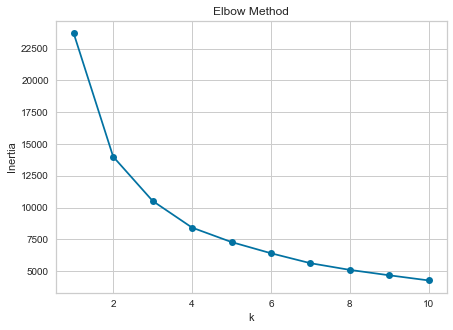

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
ssd = []
K = range(1,11)
for k in K:
    model = KMeans(n_clusters = k)
    model.fit(df_scaled)
    ssd.append(model.inertia_)
plt.plot(K, ssd, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

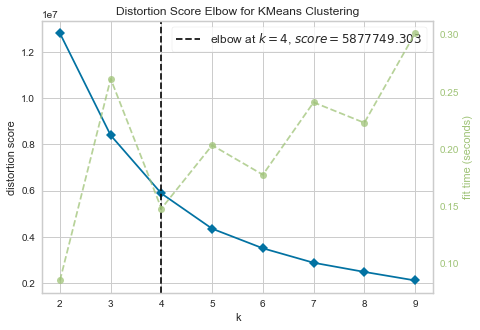

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [174]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_model)
visu.poof()

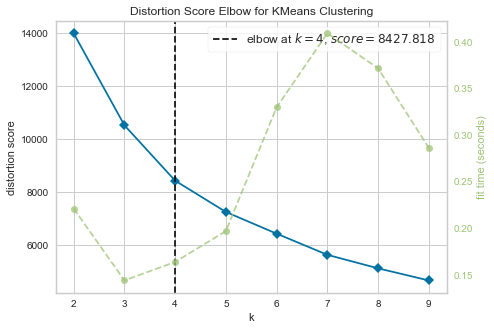

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [175]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_scaled)
visu.poof()

In [176]:
model = KMeans(n_clusters = 4).fit(df_scaled)
print(model.inertia_)
print(model.cluster_centers_)

8425.247377155614
[[-0.38660172 -0.33497309 -0.47439615  0.18447477 -0.52924755 -0.5102508 ]
 [-0.85444008  4.21676337  3.56148733  1.24861652  1.43686508  1.34350945]
 [ 1.56601032 -0.37657672 -0.55054875 -1.35198946 -0.74091511 -0.68404719]
 [-0.60604165  0.35449085  0.686603    0.6595506   1.03749496  0.98169189]]


In [177]:
import pickle
pickle.dump(model, open("saved_model.pkl", 'wb'))

In [180]:
cluster

array([2, 3, 1, ..., 0, 3, 0], dtype=int32)

In [181]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(df_scaled, model.labels_)}')

Silhouette Score(n=4): 0.36825009626816235


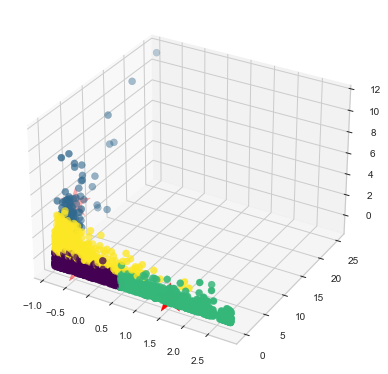

In [182]:
#3d
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=4).fit(df_scaled)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_
plt.rcParams['figure.figsize'] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,1],df_scaled.iloc[:,2],c = clusters, s = 50,cmap = 'viridis')
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c='red',marker='*',s = 1000);

### iii. Visualize the Clusters

1. Create a scatter plot and select cluster centers

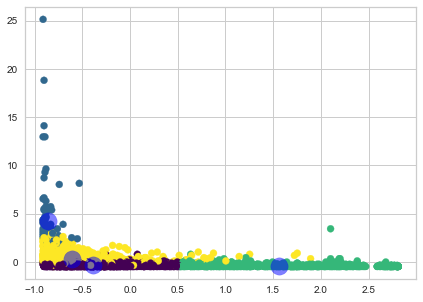

In [179]:
centers = model.cluster_centers_
cluster = model.labels_
plt.scatter(df_scaled.iloc[:,0], df_scaled.iloc[:,1], c= cluster, cmap = 'viridis')
plt.scatter(centers[:,0], centers[:,1], c='blue', s= 300, alpha = 0.5)
#Recency	Frequency	Monetary	Recency_segment	Frequency_segment	Monetary_segment

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

In [186]:
df_model['Cluster'] = cluster
df_model

,Recency,Frequency,Monetary,Recency_segment,Frequency_segment,Monetary_segment,Cluster
CustomerID,,,,,,,
12346.0,325,2,2,1,2,1,2
12747.0,2,11,45,4,4,3,3
12748.0,0,224,430,4,4,4,1
12749.0,3,8,83,4,4,4,3
12820.0,3,4,24,4,3,3,3
...,...,...,...,...,...,...,...
18280.0,277,1,8,1,1,1,2
18281.0,180,1,4,1,1,1,2
18282.0,7,3,11,4,2,1,0


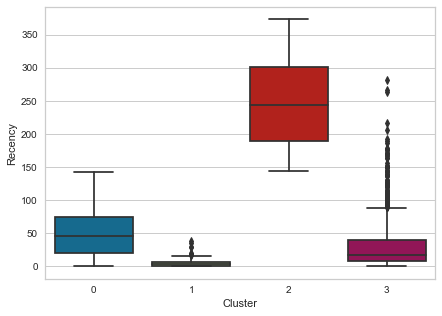

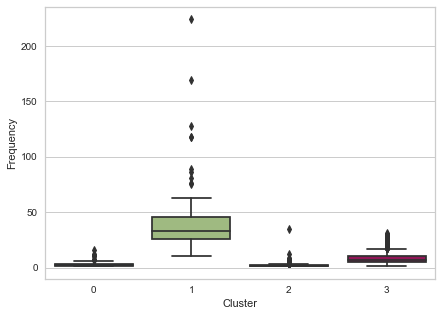

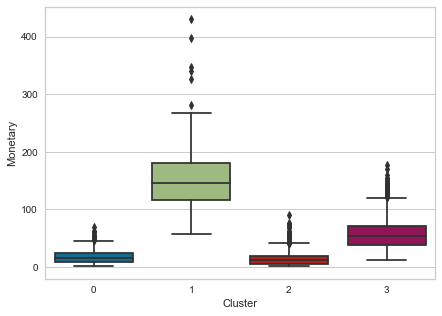

In [194]:
for i in ['Recency','Frequency','Monetary']:
    sns.boxplot(x='Cluster', y=i,data=df_model)
    plt.show()

In [187]:
df_rfm

,Recency,Frequency,Monetary,Recency_segment,Frequency_segment,Monetary_segment,Score,RFM_Level
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,2,1,4,2
12747.0,2,11,4196.01,4,4,4,12,1
12748.0,0,224,28405.56,4,4,4,12,1
12749.0,3,8,3868.20,4,4,4,12,1
12820.0,3,4,942.34,4,3,3,10,1
...,...,...,...,...,...,...,...,...
18280.0,277,1,180.60,1,1,1,3,2
18281.0,180,1,80.82,1,1,1,3,2
18282.0,7,3,176.60,4,2,1,7,2


In [188]:
ct = pd.crosstab(df_model['Cluster'], df_rfm['Score'] )
ct.T

Cluster,0,1,2,3
Score,,,,
3,0,0,368,0
4,161,0,272,0
5,308,0,172,0
6,332,0,98,9
7,349,0,32,45
8,236,0,11,95
9,116,0,3,246
10,47,1,0,270
11,7,8,0,322


### iv. Assign the Label

**Conclusion**

- Cluster 0 : The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=4), frequent buyers (F=4), and spent the most (M=4)

- Cluster 1 : Second cluster can be interpreted as passer customers as their last purchase is long ago (R<=1),purchased very few (F>=2 & F < 4) and spent little (M>=4 & M < 4).Company has to come up with new strategies to make them permanent members. Low value customers
- Cluster 2 : The third cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time(R=1), but used to purchase frequently and spent a lot.

### v. Conclusion

Discuss your final results. Compare your own labels from the Customer Segmentation with the labels found by K-Means.

How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.

**Annotation:**

Limitations of K-means clustering:

1. There is no assurance that it will lead to the global best solution.
2. Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of K-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as you might hope.

# 5. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:
- Invoice Data
- CustomerID
- Price
- Quantity

The following steps will performed to generate the Cohort Chart of Retention Rate:
- Month Extraction from InvioceDate column
- Assigning Cohort to Each Transaction
- Assigning Cohort Index to each transaction
- Calculating number of unique customers in each Group of (ChortDate,Index)
- Creating Cohort Table for Retention Rate
- Creating the Cohort Chart using the Cohort Table

The Detailed information about each step is given below:

## Feature Engineering

### i. Extract the Month of the Purchase
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

Now we will use the function created above to convert all the invoice dates into respective month date format.

### ii. Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, you will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which you'll create it below.

You will use this function to extract the integer values for Invoice as well as Cohort Date in 3 seperate series for each of the two columns

Use the variables created above to calcualte the difference in days and store them in cohort Index column.

## Create 1st Cohort: User number & Retention Rate

### i. Pivot Cohort and Cohort Retention

### ii. Visualize analysis of cohort 1 using seaborn and matplotlib modules

## Create the 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort and Cohort Retention

### ii. Visualize analysis of cohort 2 using seaborn and matplotlib modules

## Create the 3rd Cohort: Average Sales


### i. Pivot Cohort and Cohort Retention

### ii. Visualize analysis of cohort 3 using seaborn and matplotlib modules

For e-commerce organisations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get answers to following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employed to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasoanlity pattern in Customer behahiour?